In [3]:
import numpy as np
import pandas as pd

pd.options.mode.chained_assignment = None

In [4]:
# mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv("/content/drive/My Drive/data/DisneylandReviews.csv", encoding='latin-1')

In [6]:
df.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong  
1  Its been a while since d last time we visit HK...  Disneyland_HongKong  
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong  
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong  
4  the location is not in the city, took around 1...  Disneyland_HongKong

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42656 entries, 0 to 42655
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Review_ID          42656 non-null  int64 
 1   Rating             42656 non-null  int64 
 2   Year_Month         42656 non-null  object
 3   Reviewer_Location  42656 non-null  object
 4   Review_Text        42656 non-null  object
 5   Branch             42656 non-null  object
dtypes: int64(2), object(4)
memory usage: 2.0+ MB


In [ ]:
df["Year_Month"] = pd.to_datetime(df["Year_Month"], errors='coerce')

In [ ]:
df["Year"] = df["Year_Month"].dt.year
df["Month"] = df["Year_Month"].dt.month

In [ ]:
df.isnull().sum()/len(df)

Review_ID            0.000000
Rating               0.000000
Year_Month           0.061258
Reviewer_Location    0.000000
Review_Text          0.000000
Branch               0.000000
Year                 0.061258
Month                0.061258
dtype: float64

#Removing Nulls and Duplicates

In [ ]:
df.dropna(inplace=True)

In [ ]:
df["Review_ID"].value_counts()

121570980    2
121615246    2
121586148    2
121580686    2
121578357    2
            ..
444105514    1
444045161    1
444044561    1
443909273    1
91827418     1
Name: Review_ID, Length: 40023, dtype: int64

In [ ]:
df.drop_duplicates(subset="Review_ID",inplace=True, keep="first")

In [ ]:
df.shape

(40023, 8)

#Data Summary

In [ ]:
#the year has maximum reviews
df["Year"].value_counts().sort_values(ascending=False)

2015.0    6979
2016.0    6599
2014.0    5300
2017.0    5195
2013.0    4709
2012.0    4339
2018.0    3997
2011.0    1976
2019.0     786
2010.0     143
Name: Year, dtype: int64

In [ ]:
#the month has maximum reviews
df["Month"].value_counts().sort_values(ascending=False)

8.0     3994
7.0     3876
12.0    3870
10.0    3764
6.0     3588
4.0     3476
5.0     3436
9.0     3229
3.0     3132
11.0    2684
1.0     2515
2.0     2459
Name: Month, dtype: int64

In [ ]:
#the country give maximum reviews
df["Reviewer_Location"].value_counts().sort_values(ascending=False)[:10]

United States     13513
United Kingdom     9115
Australia          4409
Canada             2115
India              1469
Philippines        1024
Singapore           968
New Zealand         714
Malaysia            560
Hong Kong           515
Name: Reviewer_Location, dtype: int64

In [ ]:
#reviews from each branch
df["Branch"].value_counts().sort_values(ascending=False)

Disneyland_California    18196
Disneyland_Paris         12693
Disneyland_HongKong       9134
Name: Branch, dtype: int64

In [ ]:
#rating distribution
df["Rating"].value_counts().sort_values()

1     1338
2     1929
3     4778
4    10079
5    21899
Name: Rating, dtype: int64

In [ ]:
#mean rating
df["Rating"].mean()

4.231092122029833

In [ ]:
#top 5 countries gave best rating
df.groupby("Reviewer_Location")["Rating"].mean().sort_values(ascending=False)[:5]

Reviewer_Location
Libya                    5.0
Caribbean Netherlands    5.0
Cuba                     5.0
Curaçao                  5.0
Ethiopia                 5.0
Name: Rating, dtype: float64

In [ ]:
#top 5 countries gave worst rating
df.groupby("Reviewer_Location")["Rating"].mean().sort_values()[:5]

Reviewer_Location
Andorra                     2.000000
Turks and Caicos Islands    2.000000
South Sudan                 2.000000
Suriname                    2.000000
Ecuador                     2.333333
Name: Rating, dtype: float64

In [ ]:
#the branch customer satisfied with
df.groupby("Branch")["Rating"].mean()

Branch
Disneyland_California    4.413717
Disneyland_HongKong      4.215568
Disneyland_Paris         3.980462
Name: Rating, dtype: float64

In [ ]:
df[df["Branch"]=="Disneyland_California"]["Rating"].value_counts()

5    11799
4     3711
3     1551
2      685
1      450
Name: Rating, dtype: int64

In [ ]:
df[df["Branch"]=="Disneyland_California"]["Rating"].value_counts()*100/len(df[df["Branch"]=="Disneyland_California"])

5    64.843922
4    20.394592
3     8.523851
2     3.764564
1     2.473071
Name: Rating, dtype: float64

In [ ]:
df[df["Branch"]=="Disneyland_HongKong"]["Rating"].value_counts()*100/len(df[df["Branch"]=="Disneyland_HongKong"])

5    47.438143
4    33.369827
3    14.166849
2     3.361069
1     1.664112
Name: Rating, dtype: float64

In [ ]:
df[df["Branch"]=="Disneyland_Paris"]["Rating"].value_counts()*100/len(df[df["Branch"]=="Disneyland_Paris"])

5    45.434491
4    26.156149
3    15.228866
2     7.382022
1     5.798472
Name: Rating, dtype: float64

In [ ]:
#branch review
df[df["Reviewer_Location"]=="Australia"]["Branch"].value_counts()

Disneyland_California    2323
Disneyland_HongKong      1545
Disneyland_Paris          541
Name: Branch, dtype: int64

In [ ]:
#rating distribution
df[df["Reviewer_Location"]=="Australia"]["Rating"].value_counts()

5    2535
4    1118
3     482
2     170
1     104
Name: Rating, dtype: int64

In [ ]:
#overall rating
df[df["Reviewer_Location"]=="Australia"]["Rating"].mean()

4.317759129054207

In [ ]:
df.head()

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4 2019-04-01             Australia   
1  670682799       4 2019-05-01           Philippines   
2  670623270       4 2019-04-01  United Arab Emirates   
3  670607911       4 2019-04-01             Australia   
4  670607296       4 2019-04-01        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

     Year  Month  
0  2019.0    4.0  
1  2019.0    5.0  
2  2019.0    4.0  
3  2019.0    4.0  
4  2019.0    4.0

In [ ]:
data =df[['Review_Text', "Rating"]]

In [ ]:
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer 
import spacy
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#loading spacy library
nlp=spacy.load("en_core_web_sm")

#creating instance
lemma=WordNetLemmatizer()

In [ ]:
#creating list of stopwords containing stopwords from spacy and nltk

#stopwords of spacy
list1=nlp.Defaults.stop_words
print("Number of Stopwords in Spacy: ",len(list1))

#stopwords of NLTK
list2=stopwords.words('english')
print("Number of Stopwords in NLTK: ",len(list2))

#combining the stopword list
Stopwords=set((set(list1)|set(list2)))
print("Combined Stopwords: ",len(Stopwords))

Number of Stopwords in Spacy:  326
Number of Stopwords in NLTK:  179
Combined Stopwords:  382


In [ ]:
#Text Cleaning
def clean_text(text):
    
    """
    It takes text as an input and clean it by applying several methods
    
    """
    global Stopwords
    
    string = ""
    
    #lower casing
    text=text.lower()
    
    #simplifying text
    text=re.sub(r"i'm","i am",text)
    text=re.sub(r"he's","he is",text)
    text=re.sub(r"she's","she is",text)
    text=re.sub(r"that's","that is",text)
    text=re.sub(r"what's","what is",text)
    text=re.sub(r"where's","where is",text)
    text=re.sub(r"\'ll"," will",text)
    text=re.sub(r"\'ve"," have",text)
    text=re.sub(r"\'re"," are",text)
    text=re.sub(r"\'d"," would",text)
    text=re.sub(r"won't","will not",text)
    text=re.sub(r"can't","cannot",text)
    
    #removing any special character
    text=re.sub(r"[-()\"#!@$%^&*{}?.,:]"," ",text)
    text=re.sub(r"\s+"," ",text)
    text=re.sub('/\b\S\s\b/',' ', text)
    
    for word in text.split():
        if word not in Stopwords:
            string+=lemma.lemmatize(word)+" "
    
    return string

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

data["Review_Text"] = data["Review_Text"].apply(clean_text)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

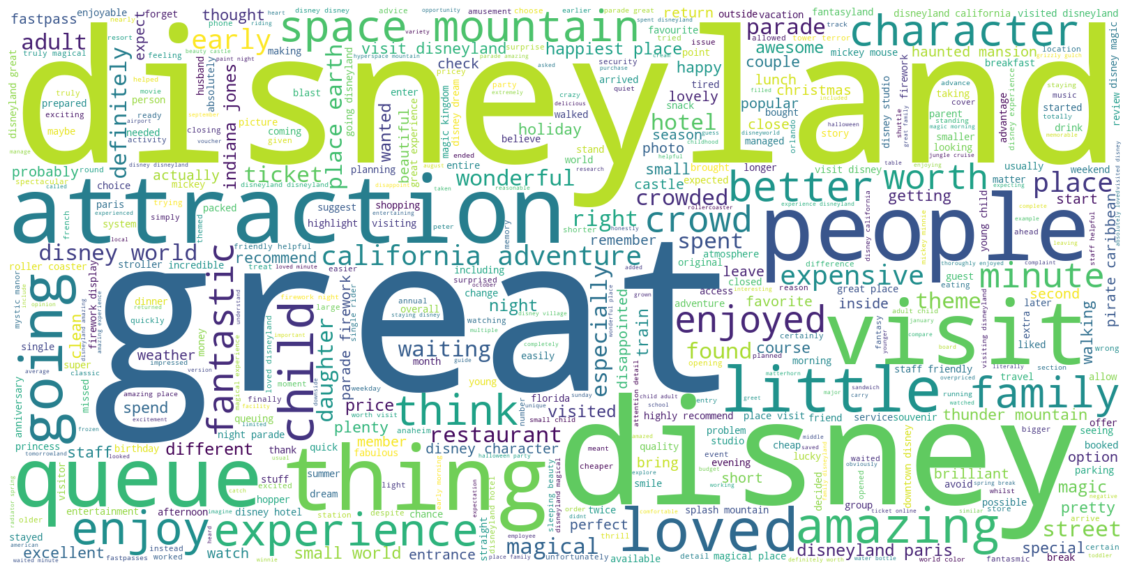

In [ ]:
#wordcloud for rating 5
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5,background_color='white').generate(" ".join(data[data.Rating == 5].Review_Text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

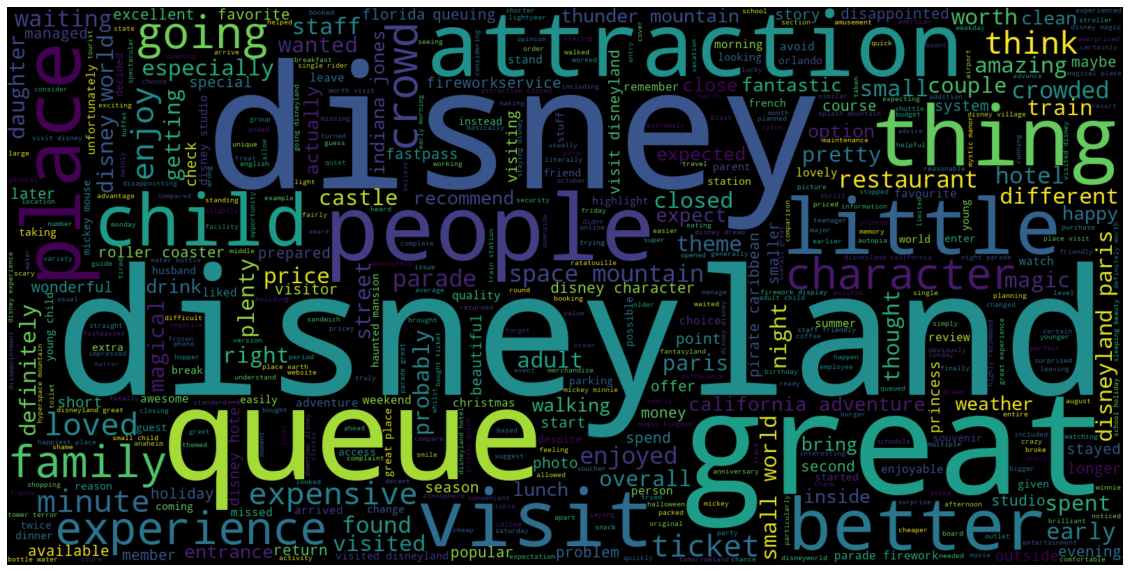

In [ ]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
               min_word_length=5).generate(" ".join(data[data.Rating == 4].Review_Text))

plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

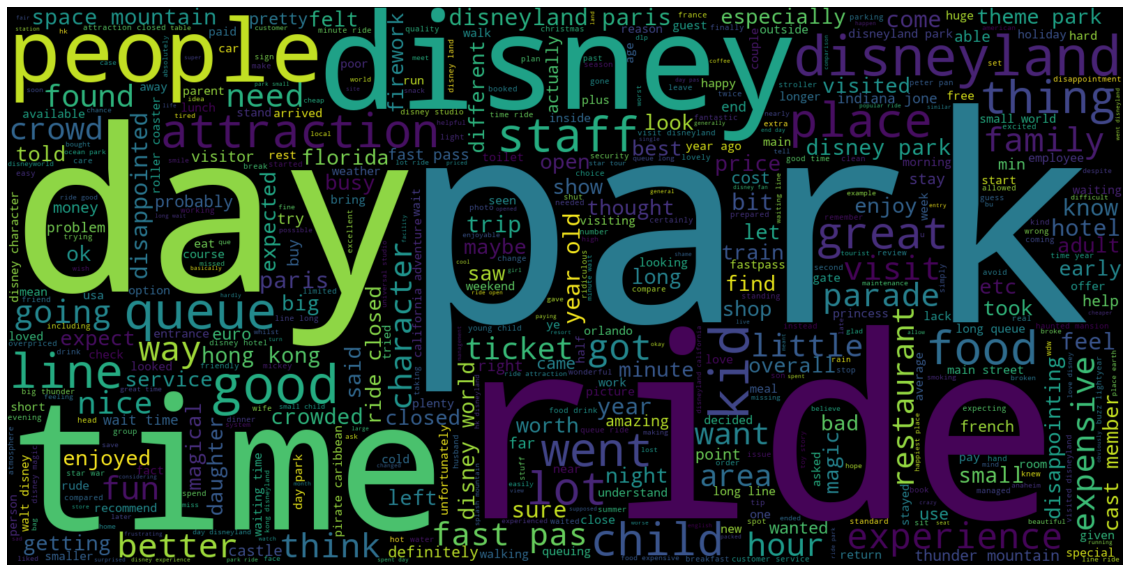

In [ ]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800).generate(" ".join(data[data.Rating == 3].Review_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

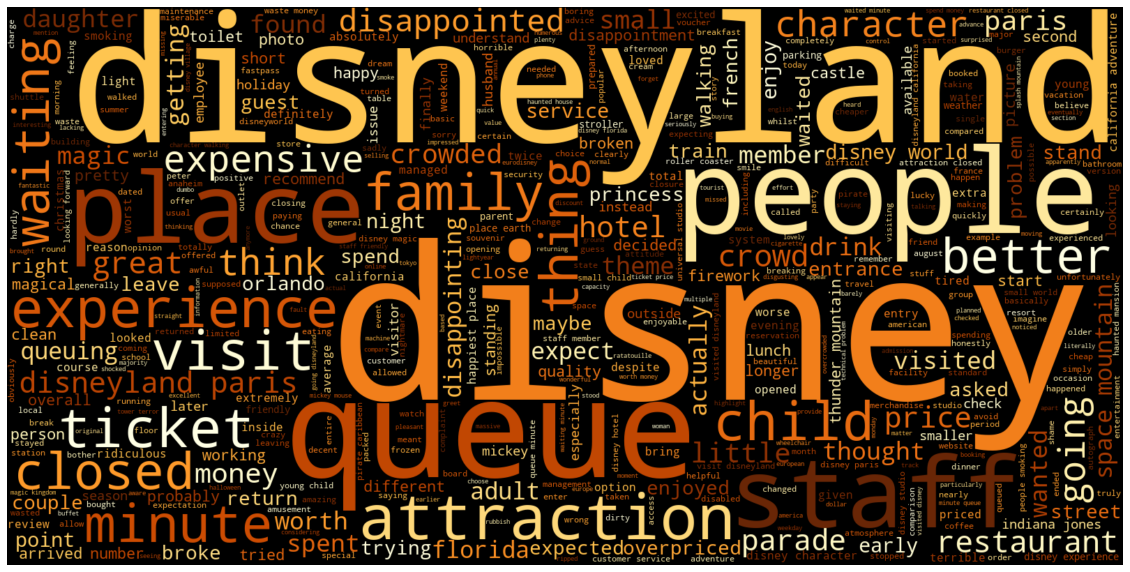

In [ ]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
              min_word_length=5,colormap="YlOrBr").generate(" ".join(data[data.Rating == 2].Review_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

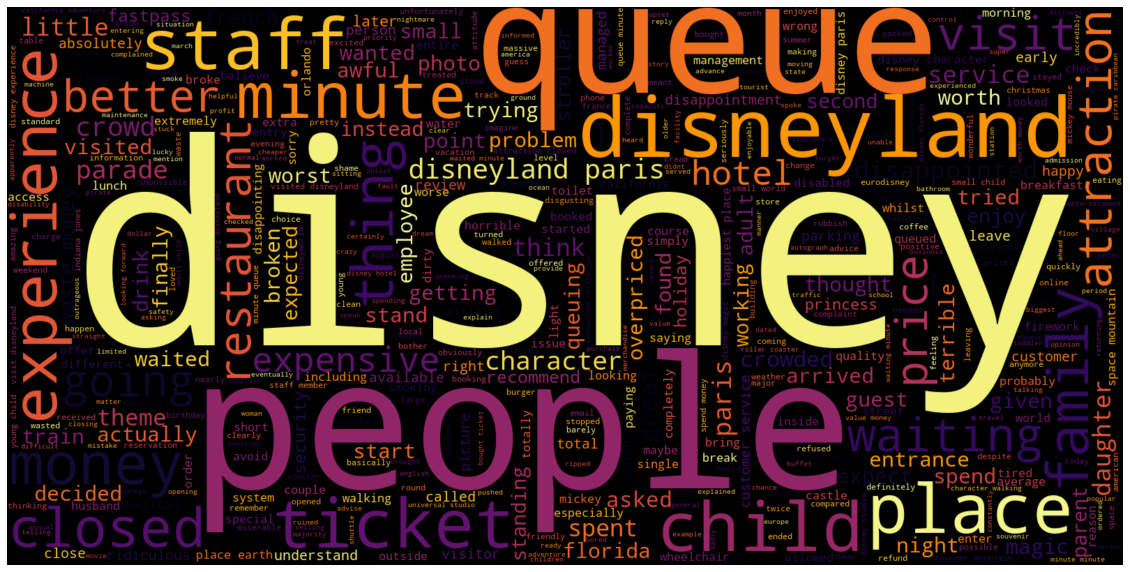

In [ ]:
plt.figure(figsize = (20,20))
Wc = WordCloud(max_words = 500 , width = 1600 , height = 800,
              min_word_length=5,colormap="inferno").generate(" ".join(data[data.Rating == 1].Review_Text))
plt.axis("off")
plt.imshow(Wc , interpolation = 'bilinear')

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
reviews = df[["Review_ID", "Review_Text"]]

In [ ]:
reviews.head(5)

Review_ID                                        Review_Text
0  670772142  If you've ever been to Disneyland anywhere you...
1  670682799  Its been a while since d last time we visit HK...
2  670623270  Thanks God it wasn   t too hot or too humid wh...
3  670607911  HK Disneyland is a great compact park. Unfortu...
4  670607296  the location is not in the city, took around 1...

In [ ]:
rev = reviews['Review_Text'][0]
rev

"If you've ever been to Disneyland anywhere you'll find Disneyland Hong Kong very similar in the layout when you walk into main street! It has a very familiar feel. One of the rides  its a Small World  is absolutely fabulous and worth doing. The day we visited was fairly hot and relatively busy but the queues moved fairly well. "

#VADER

In [ ]:
#VADER
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
sid.polarity_scores(rev)

{'neg': 0.0, 'neu': 0.887, 'pos': 0.113, 'compound': 0.7069}

In [ ]:
body = reviews.Review_Text
neg,neu,pos,compound = [], [], [], []
for review in body:
  res = sid.polarity_scores(str(review))
  neg.append(res['neg'])
  neu.append(res['neu'])
  pos.append(res['pos'])
  compound.append(res['compound'])

In [ ]:
#append results to dataframe
reviews["Negative"]=neg
reviews["Netural"]=neu
reviews["Positive"]=pos
reviews["Compound"]=compound
reviews.head(10)

Review_ID                                        Review_Text  Negative  \
0  670772142  If you've ever been to Disneyland anywhere you...     0.000   
1  670682799  Its been a while since d last time we visit HK...     0.040   
2  670623270  Thanks God it wasn   t too hot or too humid wh...     0.024   
3  670607911  HK Disneyland is a great compact park. Unfortu...     0.080   
4  670607296  the location is not in the city, took around 1...     0.000   
5  670591897  Have been to Disney World, Disneyland Anaheim ...     0.073   
6  670585330  Great place! Your day will go by and you won't...     0.087   
7  670574142  Think of it as an intro to Disney magic for th...     0.030   
8  670571027  Feel so let down with this place,the Disneylan...     0.076   
9  670570869  I can go on talking about Disneyland. Whatever...     0.028   

   Netural  Positive  Compound  
0    0.887     0.113    0.7069  
1    0.730     0.231    0.9901  
2    0.742     0.235    0.9920  
3    0.760     0.160    0.8489  
4    0.899     0.101    0.2846  
5    0.755     0.172    0.9653  
6    0.693     0.220    0.7489  
7    0.868     0.102    0.7902  
8    0.826     0.098    0.5195  
9    0.800     0.172    0.9645

In [ ]:
#to assign sentiment tag
tag=[]
for i in range(len(reviews)):
  winning_val = max(neg[i], pos[i])
  if(neg[i]==winning_val):
    tag.append("Negative")
  elif(pos[i]==winning_val):
    tag.append("Positive")

reviews["Sentiment_Tag"]=tag

In [ ]:
reviews.sample(50)

Review_ID                                        Review_Text  Negative  \
21324  221472865  We took the kids to Disneyland during the Hall...     0.051   
35263  312940234  A lot of rides were closed, the toilets were f...     0.093   
6731   234338627  If you have small children in your travelling ...     0.036   
5353   318366330  Really fun day out with lots of surprises and ...     0.045   
3850   389554538  Hong Kong Disney Land if you have never been t...     0.054   
36277  276155342  Organisation is the key to happiness as far as...     0.054   
28440  109410059  I don't care if you are five or fifty, Disneyl...     0.013   
12180  521258947  We had a really nice time at Disneyland with o...     0.037   
12539  499637729  My family and I went during a Monday and we di...     0.011   
2437   475496135  Disney is a magical experience by itself alway...     0.060   
18237  294213065  As season pass holders, our family enjoys visi...     0.000   
39023  180166022  Disneyland should be magical. The Euro version...     0.075   
30515  574867378  Does this really need a review?How can you giv...     0.000   
36069  284197190  Really great day, recommend doing the film the...     0.000   
31661  508119132  Fun, thrills, fairy tales and magic pretty muc...     0.044   
35293  311439760  Very long que for most rides. Had a fun and lo...     0.000   
5542   306215992  I love Disneyland! Pro: Staff is really friend...     0.051   
16873  331938207  I've been a huge Disney fan for years. I am we...     0.000   
17308  318959067  After visiting WDW in Florida many times, my w...     0.094   
17605  312235872  Awesome Disneyland magic. Well run super fun f...     0.000   
19098  275396632  Awesome love to go to Disneyland never diassap...     0.000   
4975   334883213  You can access this through the MTR going to L...     0.000   
23081  183282546  me and my family went to disneyland for 6 nigh...     0.008   
19989  250975074  We're Annual Passholders and over the years we...     0.063   
5029   332913957  Came a few years ago and all pretty similar   ...     0.000   
26208  135193930  Well, Disney is Disney, but this park is so mu...     0.000   
31208  535503216  One of the reasons to visit Paris was to go to...     0.015   
14889  398640077  Very hot in July but well worth it.My kids had...     0.057   
11758  543477363  I want to give it 5 stars but just can't. This...     0.000   
25062  150292251  I took my 4 year old and 1 year old to Disneyl...     0.063   
8453   145583204  Smallest Disneyland in the world, but the magi...     0.042   
31752  501735910  This has to be my all time favourite park, I l...     0.013   
40525  142583051  I went to Disneyland Paris expecting it to be ...     0.072   
34892  330082009  Came with children. In awe with the amount of ...     0.000   
37686  224852820  No doubt that it is expensive, the lines are l...     0.072   
27849  122063153  The rides are awesome regardless of weather an...     0.000   
33400  406727219  Took 3 and 9 year old for 4 days (just about e...     0.013   
2470   473727009  I've been here last Christmas. The weather is ...     0.067   
11180  570008519  Visited both Disneyland and California Adventu...     0.000   
31811  498074272  This park does not come close to meeting the q...     0.102   
1381   555471607  Don't know if it the weather had anything to d...     0.048   
5543   306207574  Me and my friends bought the 1 day pass admiss...     0.034   
23816  170328624  On our recent trip to California, we had one d...     0.040   
41864  117651661  Even the entrance is beautiful, walking under ...     0.031   
20695  235388726  Our family has been to Disneyland many times s...     0.136   
1174   571586791  We couldn't do the majority of the rides which...     0.129   
5130   329124630  What can I say, you're never to old to go Disn...     0.053   
2093   498796170  Absolute fun to visit the Disneyland. All ride...     0.022   
4697   344947122  I've been to the Dis

In [ ]:
tt=len(reviews)
pp=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Positive"].count()
nn=reviews["Sentiment_Tag"][reviews["Sentiment_Tag"]=="Negative"].count()

print("Number of Reviews :", tt)
print("Number of Positive Reviews :", pp)
print("Number of Negative Reviews :", nn)

Number of Reviews : 40023
Number of Positive Reviews : 35439
Number of Negative Reviews : 4584


In [ ]:
data["Score"] =data["Review_Text"].apply(lambda review: sid.polarity_scores(review))

In [ ]:
data["Compound_Score"] =data["Score"].apply(lambda d:d["compound"])
data.drop("Score",axis= 1,inplace=True)

In [ ]:
data.groupby("Rating")["Compound_Score"].describe()

count      mean       std     min      25%     50%     75%     max
Rating                                                                      
1        1338.0  0.093775  0.697034 -0.9916 -0.61785  0.2023  0.8074  0.9989
2        1929.0  0.354877  0.639033 -0.9873 -0.15130  0.6249  0.9002  0.9979
3        4778.0  0.568018  0.520873 -0.9766  0.38180  0.8126  0.9435  0.9990
4       10079.0  0.765761  0.343995 -0.9933  0.74300  0.9042  0.9643  0.9999
5       21899.0  0.816260  0.269674 -0.9337  0.79600  0.9186  0.9678  0.9998

In [9]:
df['Review Length'] = df['Review_Text'].apply(lambda x:len(x))

In [10]:
df.head(5)

Review_ID  Rating Year_Month     Reviewer_Location  \
0  670772142       4     2019-4             Australia   
1  670682799       4     2019-5           Philippines   
2  670623270       4     2019-4  United Arab Emirates   
3  670607911       4     2019-4             Australia   
4  670607296       4     2019-4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Review Length  
0            329  
1            970  
2            938  
3            485  
4            163

In [15]:
df = df.loc[df['Year_Month'] == 'missing']
df

Review_ID  Rating Year_Month Reviewer_Location  \
269    647038712       4    missing       Philippines   
282    646466731       3    missing         Singapore   
622    620580249       3    missing            Canada   
5347   318799221       4    missing         Australia   
5799   284745152       5    missing       Philippines   
...          ...     ...        ...               ...   
42651    1765031       5    missing    United Kingdom   
42652    1659553       5    missing            Canada   
42653    1645894       5    missing      South Africa   
42654    1618637       4    missing     United States   
42655    1536786       4    missing    United Kingdom   

                                             Review_Text               Branch  \
269    The first thing on our agenda when we finished...  Disneyland_HongKong   
282    Brought mum for the first time to Disneyland w...  Disneyland_HongKong   
622    I have been to Tokyo and LA Disneyland!I also ...  Disneyland_HongKong   
5347   We pre bought tickets at the hotel (same price...  Disneyland_HongKong   
5799   Disneyland is indeed the most magical place in...  Disneyland_HongKong   
...                                                  ...                  ...   
42651  i went to disneyland paris in july 03 and thou...     Disneyland_Paris   
42652  2 adults and 1 child of 11 visited Disneyland ...     Disneyland_Paris   
42653  My eleven year old daughter and myself went to...     Disneyland_Paris   
42654  This hotel, part of the Disneyland Paris compl...     Disneyland_Paris   
42655  I went to the Disneyparis resort, in 1996, wit...     Disneyland_Paris   

       Review Length  
269              494  
282              239  
622              414  
5347            1796  
5799             340  
...              ...  
42651            897  
42652           1020  
42653            557  
42654            605  
42655            994  

[2613 rows x 7 columns]

In [21]:
url = '/content/drive/My Drive/data/DisneylandReviews.csv'
df = pd.read_csv(url, encoding="cp1252", na_values=['missing'])
df = df.dropna().reset_index()
print("Missing Values : ", df.isnull().sum().values.sum())

Missing Values :  0


In [22]:
df.drop_duplicates(subset='Review_Text', inplace=True, keep='first')

#To get time-series features

In [24]:
#data frame with split columns for year and month
new = df["Year_Month"].str.split("-", n = 1, expand = True)
df["Year"] = new[0]
df["Month"] = new[1]
df.drop(columns = ["Year_Month"], inplace = True)

In [27]:
df["Month"] = df["Month"].astype('int64')
df['Quarter']=df['Month'].apply(lambda x:1 if x<=3 else (2 if 3<x<=6 else (3 if 6<x<=9 else (4 if 9<x<=12 else x))))

In [29]:
df.head(5)

index  Review_ID  Rating     Reviewer_Location  \
0      0  670772142       4             Australia   
1      1  670682799       4           Philippines   
2      2  670623270       4  United Arab Emirates   
3      3  670607911       4             Australia   
4      4  670607296       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year  Month  Quarter  
0  2019      4        2  
1  2019      5        2  
2  2019      4        2  
3  2019      4        2  
4  2019      4        2

In [30]:
df['Review Length'] = df['Review_Text'].apply(lambda x:len(x))

In [32]:
df.head(3)

index  Review_ID  Rating     Reviewer_Location  \
0      0  670772142       4             Australia   
1      1  670682799       4           Philippines   
2      2  670623270       4  United Arab Emirates   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   

   Year  Month  Quarter  Review Length  
0  2019      4        2            329  
1  2019      5        2            970  
2  2019      4        2            938

#Sentiment Analysis Feature using TextBlob

In [34]:
import re
features = df['Review_Text'].values
#=== 
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)
#=== 
df3=pd.DataFrame()
df3['reviews']=processed_features
#=======
from textblob import TextBlob
from wordcloud import WordCloud
# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
df3['Subjectivity'] = df3['reviews'].apply(getSubjectivity)
df3['Polarity'] = df3['reviews'].apply(getPolarity)


In [38]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df3['Analysis'] = df3['Polarity'].apply(getAnalysis)
df3.head(250)

reviews  Subjectivity  \
0    if you ve ever been to disneyland anywhere you...      0.561481   
1    its been while since last time we visit hk dis...      0.459783   
2    thanks god it wasn too hot or too humid when w...      0.434857   
3    hk disneyland is great compact park unfortunat...      0.512143   
4    the location is not in the city took around 1 ...      0.437500   
..                                                 ...           ...   
245  though hk disneyland is only fraction of the t...      0.566667   
246  always wanted to see disneyland and when had t...      0.478571   
247  sorry to say but the most interesting part was...      0.527273   
248  what day you could easily spend more than one ...      0.495833   
249  my daughter and had great day at disney we got...      0.526786   

     Polarity  Analysis  
0    0.239352  Positive  
1    0.205797  Positive  
2    0.119238  Positive  
3    0.189286  Positive  
4    0.266667  Positive  
..        ...       ...  
245  0.218229  Positive  
246  0.071429  Positive  
247  0.103030  Positive  
248  0.220833  Positive  
249  0.183929  Positive  

[250 rows x 4 columns]

In [39]:
df['sentiment']=df3['Analysis']
df['Sentiment']=df['Rating'].apply(lambda x:'Negative' if x<3 else np.nan)
df['Sentiment']=df['Sentiment'].fillna(df['sentiment'])
#== 
df['Reviews_Text']=df3['reviews']
#====
df=df.drop(['sentiment','Review_ID'],axis=1)

In [40]:
df_copy=df.copy()
df.head()

index  Rating     Reviewer_Location  \
0      0       4             Australia   
1      1       4           Philippines   
2      2       4  United Arab Emirates   
3      3       4             Australia   
4      4       4        United Kingdom   

                                         Review_Text               Branch  \
0  If you've ever been to Disneyland anywhere you...  Disneyland_HongKong   
1  Its been a while since d last time we visit HK...  Disneyland_HongKong   
2  Thanks God it wasn   t too hot or too humid wh...  Disneyland_HongKong   
3  HK Disneyland is a great compact park. Unfortu...  Disneyland_HongKong   
4  the location is not in the city, took around 1...  Disneyland_HongKong   

   Year  Month  Quarter  Review Length Sentiment  \
0  2019      4        2            329  Positive   
1  2019      5        2            970  Positive   
2  2019      4        2            938  Positive   
3  2019      4        2            485  Positive   
4  2019      4        2            163  Positive   

                                        Reviews_Text  
0  if you ve ever been to disneyland anywhere you...  
1  its been while since last time we visit hk dis...  
2  thanks god it wasn too hot or too humid when w...  
3  hk disneyland is great compact park unfortunat...  
4  the location is not in the city took around 1 ...

#Data Analysis and Visualizations

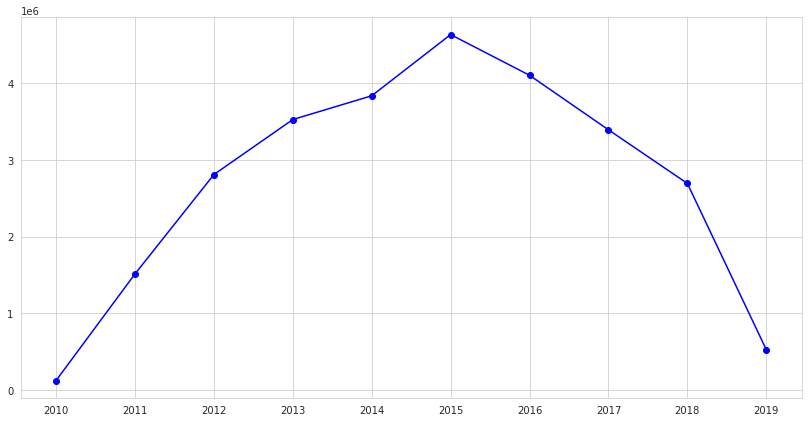

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
df3 = df.groupby('Year', as_index=False).agg({'Review Length' : 'sum'})
plt.figure(figsize=(14,7))
plt.plot(df3['Year'], df3['Review Length'], marker = 'o', label = 'Review length by year', color = 'blue')

<Figure size 720x432 with 0 Axes>

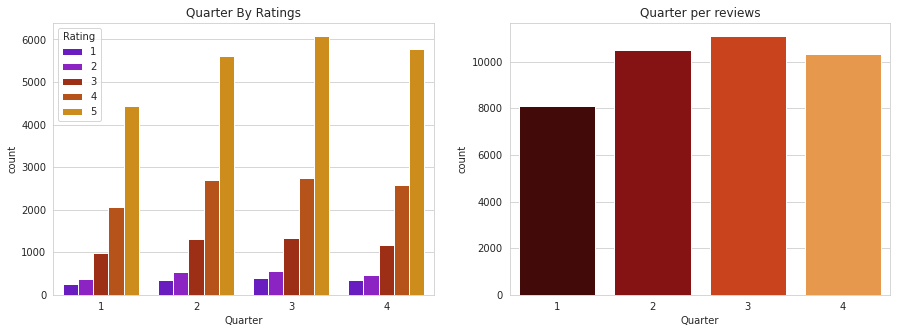

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6));
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False);
sns.countplot(ax=axes[0],data=df,x='Quarter',hue='Rating',palette='gnuplot');
axes[0].set_title('Quarter By Ratings');
sns.countplot(ax=axes[1],data=df,x='Quarter',palette='gist_heat');
axes[1].set_title('Quarter per reviews');

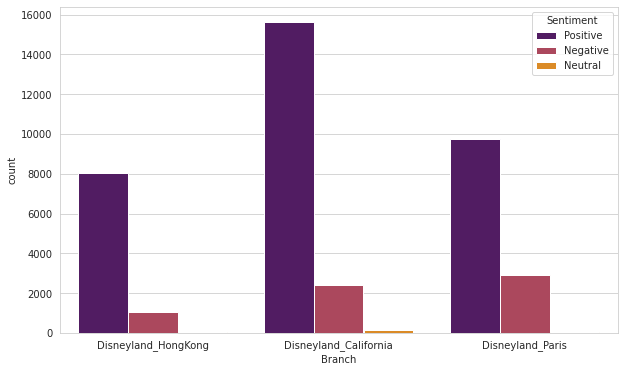

In [45]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x='Branch',hue='Sentiment',palette='inferno');